In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [46]:
data = pd.read_csv("D:/projects/flood&earthquake/Significant Earthquakes, 1965-2016/Significant Earthquakes, 1965-2016.csv")

In [47]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# Preprocessing

In [49]:
data = data.drop('ID', axis=1)

In [50]:
data.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [51]:
null_columns = data.loc[:, data.isna().sum() > 0.66 * data.shape[0]].columns

In [52]:
data = data.drop(null_columns, axis=1)

In [53]:
data.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [54]:
data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [55]:
data = data.dropna(axis=0).reset_index(drop=True)

In [56]:
data.isna().sum().sum()

0

# Feature Engineering

In [57]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed


In [58]:
data['Month'] = data['Date'].apply(lambda x: x[0:2])
data['Year'] = data['Date'].apply(lambda x: x[-4:])

data = data.drop('Date', axis=1)

In [59]:
data['Month'] = data['Month'].astype(int)

In [60]:
data[data['Year'].str.contains('Z')]

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year
3378,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,US,US,US,Reviewed,19,000Z
7510,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,US,US,HRV,Reviewed,19,530Z
20647,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,US,US,GCMT,Reviewed,20,520Z


In [61]:
invalid_year_indices = data[data['Year'].str.contains('Z')].index

data = data.drop(invalid_year_indices, axis=0).reset_index(drop=True)

In [62]:
data['Year'] = data['Year'].astype(int)

In [63]:
data['Hour'] = data['Time'].apply(lambda x: int(x[0:2]))

data = data.drop('Time', axis=1)

In [64]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22


In [65]:
data['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [66]:
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)

# Visualization

In [67]:
numeric_columns = [column for column in data.columns if data.dtypes[column] != 'object']

In [68]:
corr = data[numeric_columns].corr()

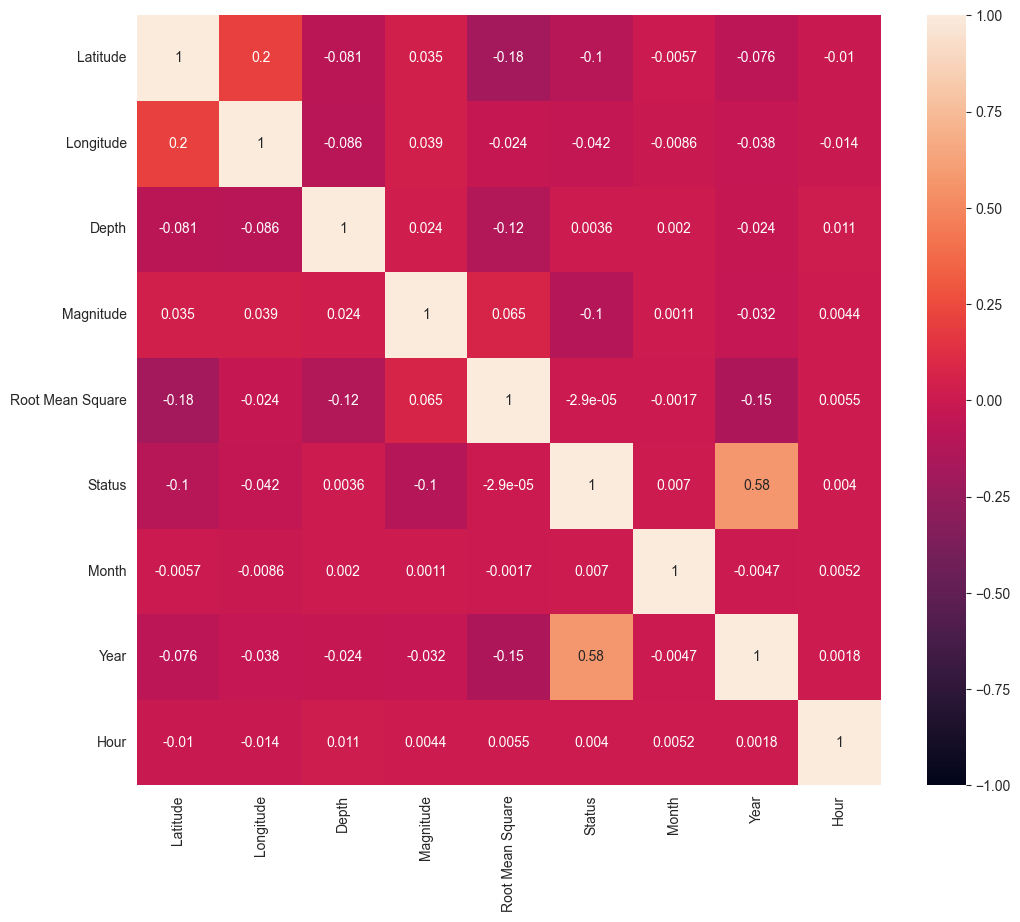

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [70]:
numeric_columns.remove('Status')

In [71]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(data[numeric_columns].copy()), columns=numeric_columns)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_15712\2648720203.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15712\2648720203.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15712\2648720203.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(standardized_df[column], shade=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_15712\2648720203.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error i

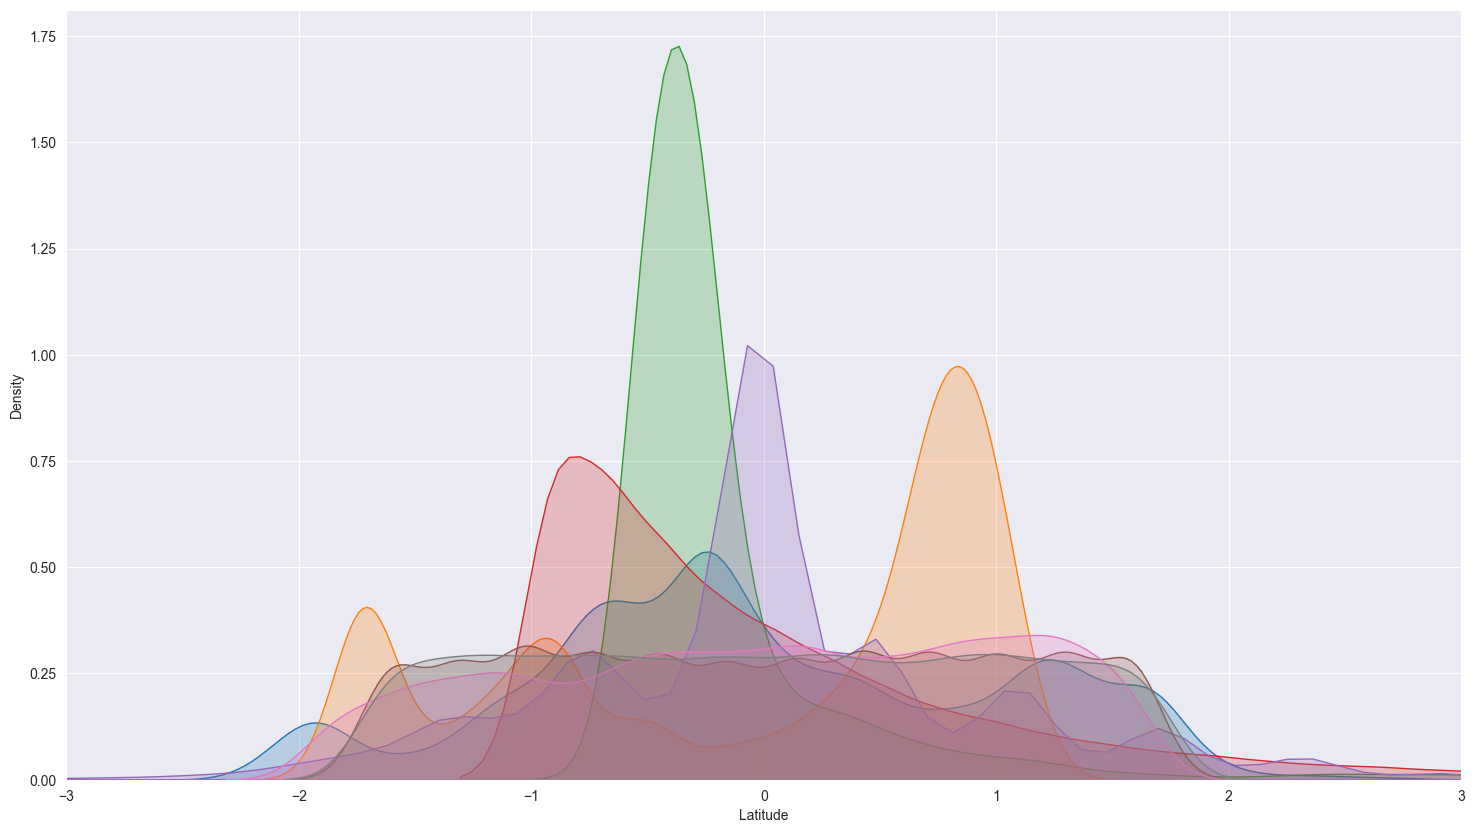

In [72]:
plt.figure(figsize=(18, 10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], shade=True)
plt.xlim(-3, 3)
plt.show()

# Encoding

In [73]:
data

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,2016,22


In [74]:
data['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [75]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [76]:
data = onehot_encode(
    data,
    ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
    ['t', 'mt', 's', 'ls', 'ms']
)

In [77]:
data

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,t_Earthquake,...,ms_NN,ms_OFFICIAL,ms_PAR,ms_PGC,ms_PR,ms_SE,ms_US,ms_US_GCMT,ms_US_PGC,ms_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,True,...,False,False,False,False,False,False,False,False,False,False
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,True,...,False,False,False,False,False,False,False,False,False,False
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,True,...,False,False,False,False,False,False,False,False,False,False
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,True,...,False,False,False,False,False,False,False,False,False,False
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,True,...,True,False,False,False,False,False,False,False,False,False
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,True,...,True,False,False,False,False,False,False,False,False,False
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,True,...,False,False,False,False,False,False,True,False,False,False
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,True,...,False,False,False,False,False,False,True,False,False,False


# Splitting and Scaling

In [78]:
y = data.loc[:, 'Status']
X = data.drop('Status', axis=1)

In [79]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [80]:
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=56)

# Modeling and Training


In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout, BatchNormalization

input_shape = shape=(104,)

# Define list of models to compare
models = [
    {'name': 'Model 1', 'layers': [Dense(64, activation='relu'), Dense(64, activation='relu'), Dense(64, activation='relu'), Dense(1, activation='sigmoid')]},
    {'name': 'Model 2', 'layers': [Dense(128, activation='relu'), Dense(1, activation='sigmoid')]},
    {'name': 'Model 3', 'layers': [Dense(64, activation='relu'), Dropout(0.5), Dense(64, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')]},
]

# Define evaluation metrics
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'auc': roc_auc_score
}
# Initialize results list
results = []

# Train and evaluate models
for model_info in models:
    model = Sequential(model_info['layers'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Evaluate model
    y_pred = model.predict(X_val)
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'auc':
            model_metrics[metric_name] = metric_func(y_val, y_pred)
        else:
            model_metrics[metric_name] = metric_func(y_val, y_pred.round())

    # Add results to list
    results.append({'Model': model_info['name'], **model_metrics})

# Create DataFrame from results list
results_df = pd.DataFrame(results)

# Print results
print(results_df)

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
     Model  accuracy  precision    recall        f1       auc
0  Model 1  1.000000        1.0  1.000000  1.000000  1.000000
1  Model 2  0.998474        1.0  0.998291  0.999145  0.998975
2  Model 3  0.998779        1.0  0.998633  0.999316  0.999316


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


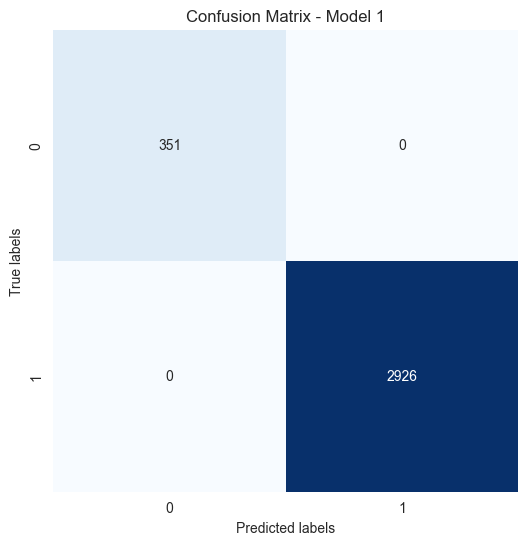

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


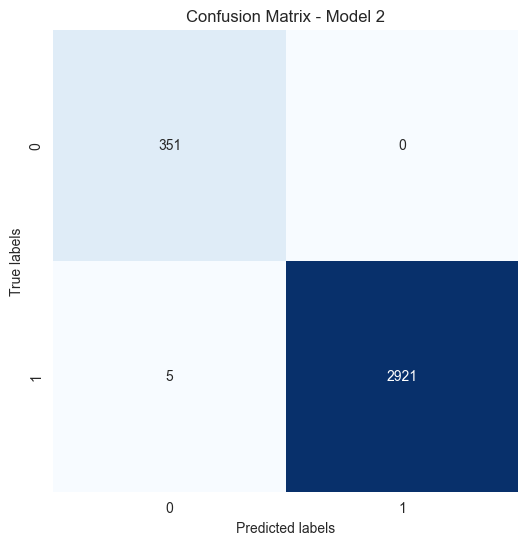

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


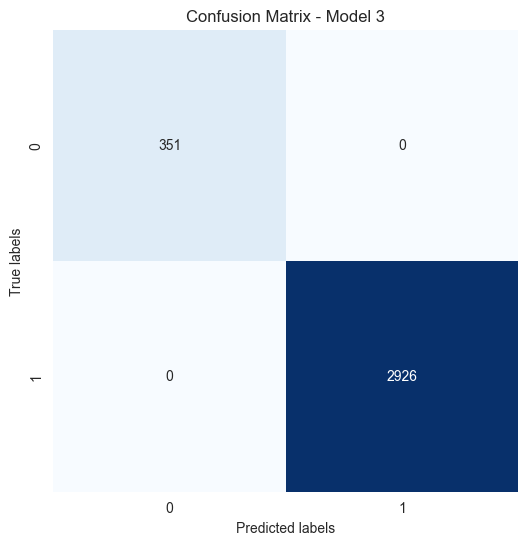

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train and evaluate models
for model_info in models:
    model = Sequential(model_info['layers'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    # Evaluate model
    y_pred = model.predict(X_val).round()

    # Calculate confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_info["name"]}')
    plt.show()


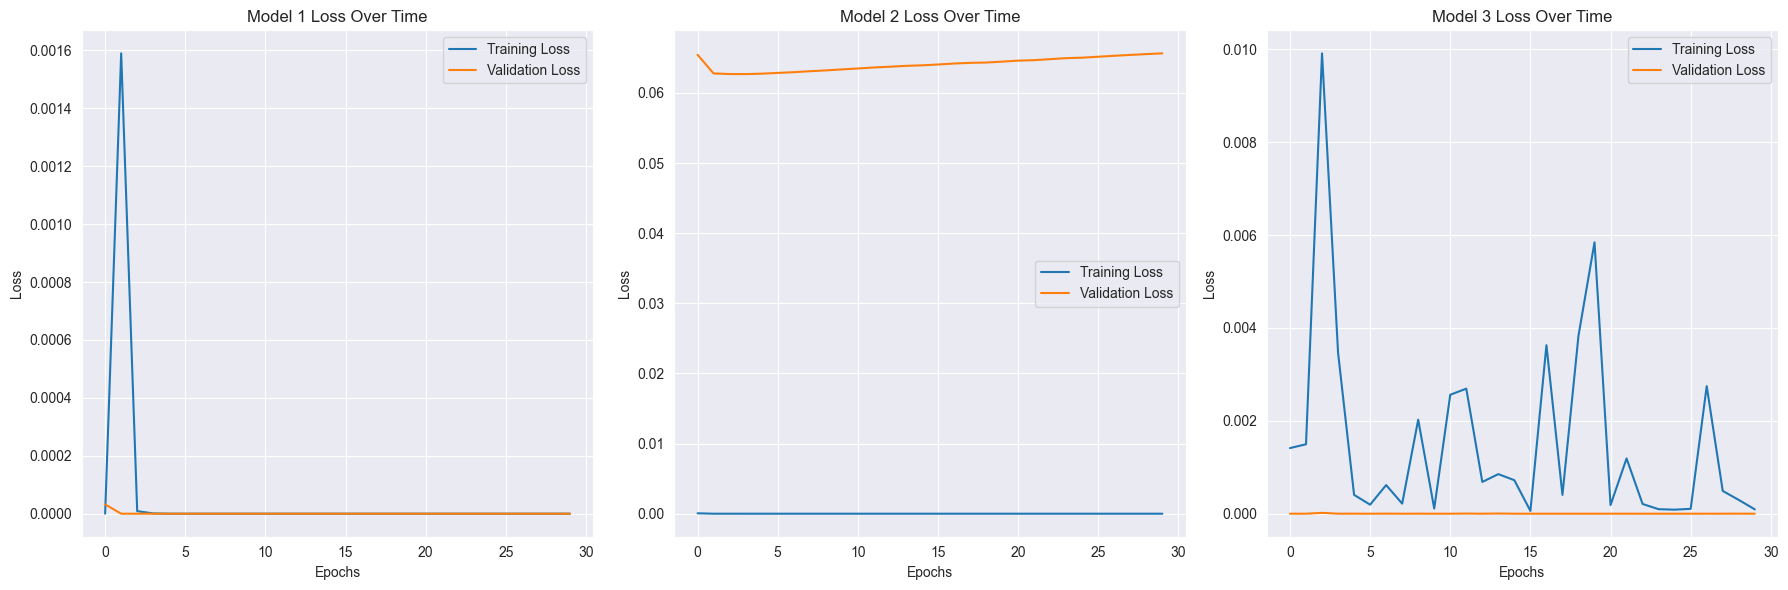

In [84]:
import matplotlib.pyplot as plt

# Initialize figure
plt.figure(figsize=(18, 6))

# Plotting loss over time
for i, model_info in enumerate(models, start=1):
    model = Sequential(model_info['layers'])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=0)

    plt.subplot(1, len(models), i)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_info['name']} Loss Over Time")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

In [85]:
# Select the best model based on chosen metric (e.g., AUC)
best_model = results_df.loc[results_df['auc'].idxmax()]

print("Best model:", best_model['Model'])
print("AUC:", best_model['auc'])

Best model: Model 1
AUC: 1.0


In [86]:
# Retrieve the best model name
best_model_name = results_df.loc[results_df['auc'].idxmax(), 'Model']

# Find the corresponding model architecture
best_model_architecture = next(model_info['layers'] for model_info in models if model_info['name'] == best_model_name)

# Create the best model
best_model = Sequential(best_model_architecture)
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the best model on the full training set
best_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9999 - loss: 6.5967e-04
Test accuracy: 0.9998576045036316
